## JMETALPY

A l'instar de Pymoo, les problèmes sont complexes à implémenter

In [4]:
from jmetal.algorithm.multiobjective.mocell import MOCell
from jmetal.operator import SBXCrossover, PolynomialMutation
from jmetal.problem import ZDT4
from jmetal.util.archive import CrowdingDistanceArchive
from jmetal.util.neighborhood import C9
from jmetal.util.termination_criterion import StoppingByEvaluations

problem = ZDT4() # Problème déjà implémenté

max_evaluations = 25000

# sélection de l'algorithme

algorithm = MOCell(
    problem=problem,
    population_size=100,
    neighborhood=C9(10, 10),
    archive=CrowdingDistanceArchive(100),
    mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables(), distribution_index=20),
    crossover=SBXCrossover(probability=1.0, distribution_index=20),
    termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations)
)

algorithm.run()
front = algorithm.get_result()

[2024-06-21 14:07:14,001] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-21 14:07:14,003] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-21 14:07:14,003] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-21 14:07:14,003] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-21 14:07:16,709] [jmetal.core.algorithm] [DEBUG] Finished!


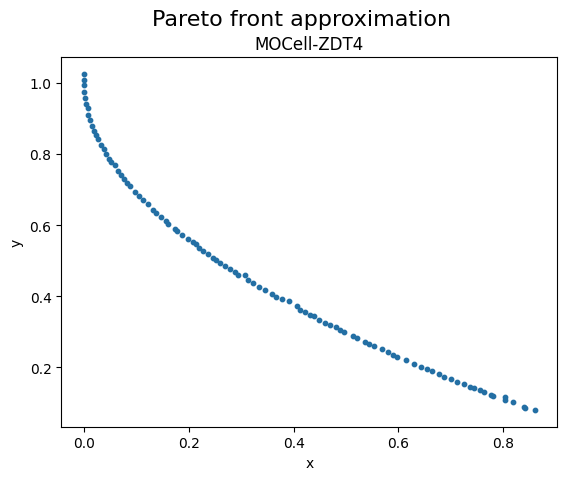

In [2]:
from jmetal.lab.visualization.plotting import Plot

plot_front = Plot(title='Pareto front approximation', axis_labels=['x', 'y'])
plot_front.plot(front, label='MOCell-ZDT4')


In [7]:
# Exemple de nouveau problème
from jmetal.core.problem import BinaryProblem, BinarySolution
class SubsetSum(BinaryProblem):

   def __init__(self, C: int, W: list):
      super(SubsetSum, self).__init__(reference_front=None)
      self.C = C
      self.W = W

      self.number_of_bits = len(self.W)
      self.number_of_objectives = 1
      self.number_of_variables = 1
      self.number_of_constraints = 0

      self.obj_directions = [self.MAXIMIZE]
      self.obj_labels = ['Sum']

   def evaluate(self, solution: BinarySolution) -> BinarySolution:
      pass

   def create_solution(self) -> BinarySolution:
      pass

   def get_name(self) -> str:
      return 'Subset Sum'